[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Word Tokens: ['since', 'i', 'have', 'to', 'write', 'a', 'paragraph', 'for', 'my', 'cc', 'assignment', 'i', '’', 'll', 'talk', 'about', 'some', 'of', 'my', 'favorite', 'things', 'and', 'hobbies', 'i', 'really', 'enjoy', 'drawing', 'it', '’', 's', 'something', 'i', '’', 've', 'loved', 'doing', 'for', 'a', 'long', 'time', 'and', 'it', 'helps', 'me', 'relax', 'and', 'be', 'creative', 'i', '’', 'm', 'also', 'a', 'big', 'fan', 'of', 'reading', 'especially', 'when', 'it', 'comes', 'to', 'fantasy', 'romance', 'well', 'i', 'just', 'like', 'anything', 'that', 'lets', 'me', 'escape', 'reality', 'for', 'a', 'bit', 'oh', 'and', 'my', 'favorite', 'color', 'is', 'purple']
Sentence Tokens: ['\nSince I have to write a paragraph for my CC assignment, I’ll talk about some of my favorite things and hobbies.', 'I really enjoy drawing, it’s something I’ve loved doing for a long time, and it helps me relax and be creative.', 'I’m also a big fan of reading, especially when it comes to fantasy romance.', 'Well

<Axes: xlabel='Samples', ylabel='Counts'>

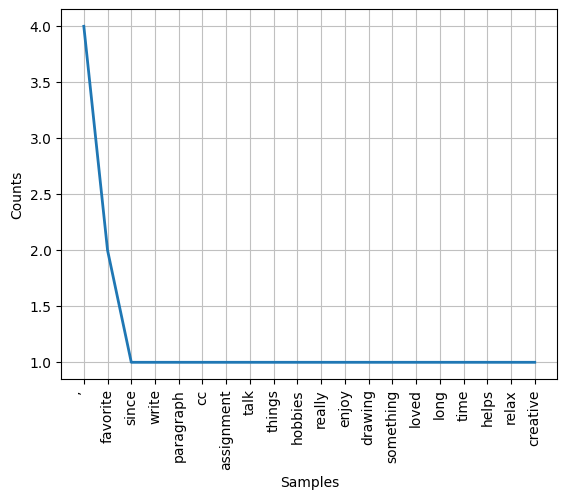

In [2]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Step 1: Paragraph
text = """
Since I have to write a paragraph for my CC assignment, I’ll talk about some of my favorite things and hobbies.
I really enjoy drawing, it’s something I’ve loved doing for a long time, and it helps me relax and be creative.
I’m also a big fan of reading, especially when it comes to fantasy romance.
Well, I just like anything that lets me escape reality for a bit. Oh, and my favorite color is purple.
"""

# Step 1: Lowercase & remove punctuation
text_lower = text.lower()
text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))

# Step 2: Tokenization
word_tokens = word_tokenize(text_no_punct)
sent_tokens = sent_tokenize(text)

# Step 3: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]

# Step 4: Frequency Distribution
freq_dist = FreqDist(filtered_words)

print("Word Tokens:", word_tokens)
print("Sentence Tokens:", sent_tokens)
print("Filtered Words (No Stopwords):", filtered_words)
print("Frequency Distribution:")
freq_dist.plot(20, cumulative=False)


In [3]:
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

porter_stemmed = [porter.stem(word) for word in filtered_words]
lancaster_stemmed = [lancaster.stem(word) for word in filtered_words]
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]

print("Porter Stemmer:", porter_stemmed)
print("Lancaster Stemmer:", lancaster_stemmed)
print("Lemmatized:", lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Porter Stemmer: ['sinc', 'write', 'paragraph', 'cc', 'assign', '’', 'talk', 'favorit', 'thing', 'hobbi', 'realli', 'enjoy', 'draw', '’', 'someth', '’', 'love', 'long', 'time', 'help', 'relax', 'creativ', '’', 'also', 'big', 'fan', 'read', 'especi', 'come', 'fantasi', 'romanc', 'well', 'like', 'anyth', 'let', 'escap', 'realiti', 'bit', 'oh', 'favorit', 'color', 'purpl']
Lancaster Stemmer: ['sint', 'writ', 'paragraph', 'cc', 'assign', '’', 'talk', 'favorit', 'thing', 'hobby', 'real', 'enjoy', 'draw', '’', 'someth', '’', 'lov', 'long', 'tim', 'help', 'relax', 'cre', '’', 'also', 'big', 'fan', 'read', 'espec', 'com', 'fantasy', 'rom', 'wel', 'lik', 'anyth', 'let', 'escap', 'real', 'bit', 'oh', 'favorit', 'col', 'purpl']
Lemmatized: ['since', 'write', 'paragraph', 'cc', 'assignment', '’', 'talk', 'favorite', 'thing', 'hobby', 'really', 'enjoy', 'drawing', '’', 'something', '’', 'loved', 'long', 'time', 'help', 'relax', 'creative', '’', 'also', 'big', 'fan', 'reading', 'especially', 'come', 

In [4]:
# Step 1: Original Text
original_text = text

# a. Words > 5 letters
words_gt_5 = re.findall(r'\b\w{6,}\b', original_text)

# b. Numbers
numbers = re.findall(r'\b\d+\b', original_text)

# c. Capitalized Words
capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', original_text)

# d. Split into words with only alphabets
alpha_words = re.findall(r'\b[a-zA-Z]+\b', original_text)

# e. Words starting with vowels
vowel_words = [word for word in alpha_words if word[0].lower() in 'aeiou']

print("Words > 5 letters:", words_gt_5)
print("Numbers:", numbers)
print("Capitalized Words:", capitalized_words)
print("Alphabet-only Words:", alpha_words)
print("Words Starting with Vowels:", vowel_words)

Words > 5 letters: ['paragraph', 'assignment', 'favorite', 'things', 'hobbies', 'really', 'drawing', 'something', 'creative', 'reading', 'especially', 'fantasy', 'romance', 'anything', 'escape', 'reality', 'favorite', 'purple']
Numbers: []
Capitalized Words: ['Since', 'I', 'I', 'I', 'I', 'I', 'Well', 'I', 'Oh']
Alphabet-only Words: ['Since', 'I', 'have', 'to', 'write', 'a', 'paragraph', 'for', 'my', 'CC', 'assignment', 'I', 'll', 'talk', 'about', 'some', 'of', 'my', 'favorite', 'things', 'and', 'hobbies', 'I', 'really', 'enjoy', 'drawing', 'it', 's', 'something', 'I', 've', 'loved', 'doing', 'for', 'a', 'long', 'time', 'and', 'it', 'helps', 'me', 'relax', 'and', 'be', 'creative', 'I', 'm', 'also', 'a', 'big', 'fan', 'of', 'reading', 'especially', 'when', 'it', 'comes', 'to', 'fantasy', 'romance', 'Well', 'I', 'just', 'like', 'anything', 'that', 'lets', 'me', 'escape', 'reality', 'for', 'a', 'bit', 'Oh', 'and', 'my', 'favorite', 'color', 'is', 'purple']
Words Starting with Vowels: ['I',

In [5]:
def custom_tokenizer(text):
    # Remove punctuation (keep contractions and hyphenated words)
    text = re.sub(r"[^\w\s\-']", ' ', text)

    # Keep decimal numbers intact
    text = re.sub(r'(?<=\d)\s(?=\d)', '', text)

    # Tokenize
    tokens = re.findall(r"\b\w+(?:[-']\w+)*\.?\w*\b", text)
    return tokens

# Regex substitutions
def regex_substitutions(text):
    # Email
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', '<EMAIL>', text)
    # URL
    text = re.sub(r'http[s]?://\S+|www\.\S+', '<URL>', text)
    # Phone numbers
    text = re.sub(r'\b(?:\+91\s?\d{10}|\d{3}[-.\s]?\d{3}[-.\s]?\d{4})\b', '<PHONE>', text)
    return text

custom_tokens = custom_tokenizer(text)
cleaned_text = regex_substitutions(text)

print("Custom Tokens:", custom_tokens)
print("Cleaned Text with Placeholders:")
print(cleaned_text)

Custom Tokens: ['Since', 'I', 'have', 'to', 'write', 'a', 'paragraph', 'for', 'my', 'CC', 'assignment', 'I', 'll', 'talk', 'about', 'some', 'of', 'my', 'favorite', 'things', 'and', 'hobbies', 'I', 'really', 'enjoy', 'drawing', 'it', 's', 'something', 'I', 've', 'loved', 'doing', 'for', 'a', 'long', 'time', 'and', 'it', 'helps', 'me', 'relax', 'and', 'be', 'creative', 'I', 'm', 'also', 'a', 'big', 'fan', 'of', 'reading', 'especially', 'when', 'it', 'comes', 'to', 'fantasy', 'romance', 'Well', 'I', 'just', 'like', 'anything', 'that', 'lets', 'me', 'escape', 'reality', 'for', 'a', 'bit', 'Oh', 'and', 'my', 'favorite', 'color', 'is', 'purple']
Cleaned Text with Placeholders:

Since I have to write a paragraph for my CC assignment, I’ll talk about some of my favorite things and hobbies. 
I really enjoy drawing, it’s something I’ve loved doing for a long time, and it helps me relax and be creative. 
I’m also a big fan of reading, especially when it comes to fantasy romance. 
Well, I just lik